In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime 
import calendar
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [0]:
df_fraud = pd.read_csv('gdrive/My Drive/CSV_Files/Fraud_Data.csv')
df_ip    = pd.read_csv('gdrive/My Drive/CSV_Files/IpAddress_to_Country.csv')

In [0]:
df = pd.concat([df_fraud, df_ip], axis = 1)
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,16777216.0,16777471.0,Australia
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,16777472.0,16777727.0,China
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,16777728.0,16778239.0,China
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,16778240.0,16779263.0,Australia
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,16779264.0,16781311.0,China


In [0]:
df.shape

(151112, 14)

In [0]:
df.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class',
       'lower_bound_ip_address', 'upper_bound_ip_address', 'country'],
      dtype='object')

In [0]:
fraud_list = df['class'].value_counts()
fraud_list

0    136961
1     14151
Name: class, dtype: int64

In [0]:
fraud_list[1]/df.shape[0]

0.09364577267192546

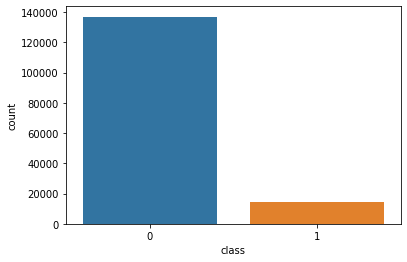

In [0]:
sns.countplot(x = df['class'], data = df)

In [0]:
df.isnull().sum()

user_id                       0
signup_time                   0
purchase_time                 0
purchase_value                0
device_id                     0
source                        0
browser                       0
sex                           0
age                           0
ip_address                    0
class                         0
lower_bound_ip_address    12266
upper_bound_ip_address    12266
country                   12266
dtype: int64

In [0]:
df.nunique()/df.shape[0]

user_id                   1.000000
signup_time               1.000000
purchase_time             0.997135
purchase_value            0.000807
device_id                 0.912939
source                    0.000020
browser                   0.000033
sex                       0.000013
age                       0.000384
ip_address                0.949706
class                     0.000013
lower_bound_ip_address    0.918828
upper_bound_ip_address    0.918828
country                   0.001555
dtype: float64

In [0]:
# Unique Values in the dataset
import pprint
for cols in ['purchase_value', 'source', 'browser', 'sex', 'age']:
  pprint.pprint('{} : {} '.format(cols, df[cols].unique()))

('purchase_value : [ 34  16  15  44  39  42  11  27  30  62  13  58  18  50  '
 '57  55  40  46\n'
 '  24  47  25  52  31  37  54  12  48  56  72  38  33  53  35  60  91  26\n'
 '  75  51  81  69  36  10  14  29  21  61  41  19  28  65   9  79  23  73\n'
 '  45  20  78  22  32  68  43  82  59  70  63  86  80  66  49  17  64 107\n'
 '  87  67  76  90  88  92  77  85  71  74 101  96  93  98 123  89  84  94\n'
 '  83  99 118 103 112 105  97 120 100 109  95 106 110 102 115 119 111 108\n'
 ' 129 154 116 104 113 117 121 128 127 122 114 132 140 125] ')
"source : ['SEO' 'Ads' 'Direct'] "
"browser : ['Chrome' 'Opera' 'Safari' 'IE' 'FireFox'] "
"sex : ['M' 'F'] "
('age : [39 53 41 45 18 19 34 43 31 35 32 33 38 24 23 28 36 27 56 21 22 30 57 '
 '44\n'
 ' 40 55 37 20 48 25 46 29 26 47 60 52 42 49 50 58 51 59 62 54 68 64 61 63\n'
 ' 72 67 65 69 66 73 70 71 74 76] ')


In [0]:
print('The user_id column contains {} duplicates'.format(df.duplicated
          (subset='user_id', keep = False).sum()  ))

The user_id column contains 0 duplicates


In [0]:
dup_table = pd.DataFrame(df.duplicated(subset='device_id'))
dup_rate = dup_table.mean()
dup_rate

0    0.087061
dtype: float64

In [0]:
print('{}% of the dataset is comprised of transaction from a devie_id that had been previously used'. format(int(dup_rate*1000)/10))

8.7% of the dataset is comprised of transaction from a devie_id that had been previously used


In [0]:
device_duplicate = pd.DataFrame(df.groupby(by='device_id').device_id.count())
device_duplicate.head()
#device_duplicate.device_id.value_counts().sort_values()

,device_id
device_id,
AAALBGNHHVMKG,1
AAAWIHVCQELTP,1
AAAXJHWCLISKY,1
AAAXXOZJRZRAO,11
AABFGRPBQHWFQ,1


In [0]:
device_duplicate.rename(columns = {'device_id':'freq_device'}, inplace=True)

In [0]:
device_duplicate.head()

,freq_device
device_id,
AAALBGNHHVMKG,1
AAAWIHVCQELTP,1
AAAXJHWCLISKY,1
AAAXXOZJRZRAO,11
AABFGRPBQHWFQ,1


In [0]:
device_duplicate.reset_index(level=0, inplace=True)

In [0]:
dup_1 = device_duplicate[device_duplicate.freq_device > 1]
print('Mean when frequency is greater than one %0.2f'%(dup_1.mean() *10/10))

Mean when frequency is greater than one 3.13


In [0]:
dup_2 = device_duplicate[device_duplicate.freq_device > 2]

In [0]:
print('Mean when frequency is greater than two %0.2f' % (dup_2.mean()*10/10))

Mean when frequency is greater than two 10.23


In [0]:
df = df.merge(device_duplicate, on = 'device_id')

In [0]:
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country,freq_device
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,1.677722e+07,1.677747e+07,Australia,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,1.677747e+07,1.677773e+07,China,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,1.677773e+07,1.677824e+07,China,12
3,48288,2015-01-01 18:52:41,2015-01-01 18:52:42,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,5.326766e+08,5.326930e+08,Georgia,12
4,128706,2015-01-01 18:52:40,2015-01-01 18:52:41,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,1.540896e+09,1.540897e+09,Slovenia,12


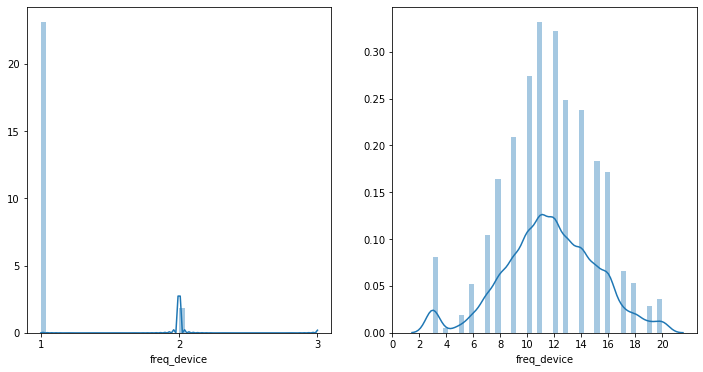

In [0]:
f, ax = plt.subplots(1,2, figsize=(12, 6))
g1 = sns.distplot(df.freq_device[df.freq_device < 4], ax=ax[0])
g1.set(xticks=[1,2,3])
g2 = sns.distplot(df.freq_device[df.freq_device > 2], ax = ax[1])
g2.set(xticks=range(0,21,2))
plt.show()

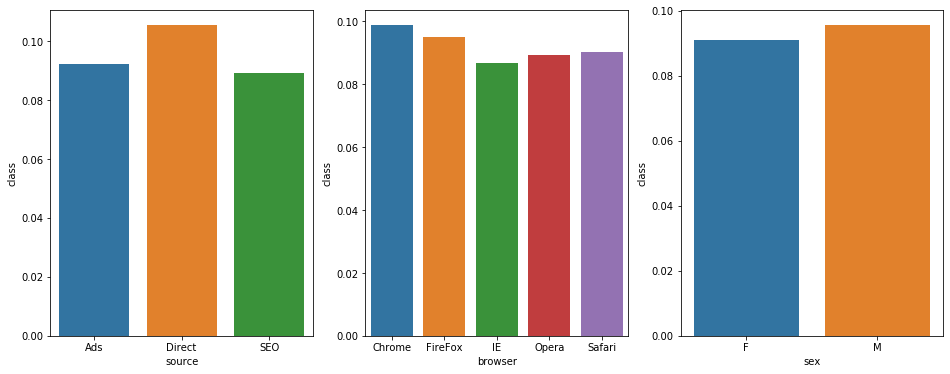

In [0]:
f, ax = plt.subplots(1, 3, figsize=(16, 6))
sns.barplot(df.groupby(by='source').mean()['class'].index, df.groupby(by='source').mean()['class'], ax=ax[0])
sns.barplot(df.groupby(by='browser').mean()['class'].index, df.groupby(by='browser').mean()['class'], ax=ax[1])
sns.barplot(df.groupby(by='sex').mean()['class'].index, df.groupby(by='sex').mean()['class'], ax=ax[2])


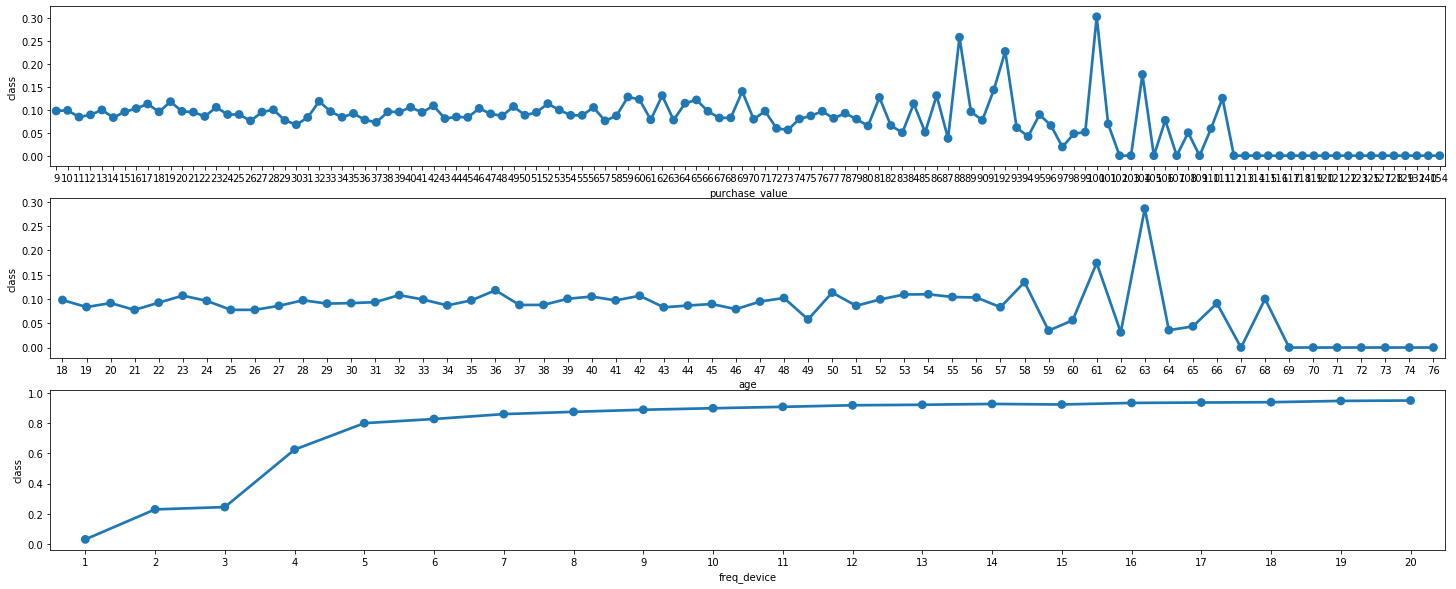

In [0]:
f, ax = plt.subplots(3, 1, figsize=(25, 10))
sns.pointplot(x = 'purchase_value', y = 'class', data = df, logistic=True,ci=None, ax=ax[0])
sns.pointplot(x = 'age', y='class', data = df, logistic=True, ci=None, ax = ax[1])
sns.pointplot(x = 'freq_device', y = 'class', data = df, logistic=True, ci=None, ax= ax[2])

In [0]:
df.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class',
       'lower_bound_ip_address', 'upper_bound_ip_address', 'country',
       'freq_device'],
      dtype='object')

In [0]:
df.country.unique()

array(['Australia', 'China', 'Georgia', 'Slovenia', 'United States',
       'Brazil', 'Poland', 'Malaysia', nan, 'Japan', 'Thailand',
       'Russian Federation', 'Germany', 'European Union', 'South Africa',
       'United Kingdom', 'Hong Kong', 'India', 'Colombia',
       'Korea Republic of', 'Taiwan; Republic of China (ROC)',
       'Philippines', 'Viet Nam', 'Romania', 'Netherlands', 'Pakistan',
       'Switzerland', 'Malta', 'Canada', 'Mexico', 'Ukraine', 'France',
       'Austria', 'Italy', 'United Arab Emirates', 'Israel', 'Sweden',
       'Kazakhstan', 'Portugal', 'Greece', 'Saudi Arabia', 'Denmark',
       'Spain', 'Iran (ISLAMIC Republic Of)', 'Macedonia', 'Norway',
       'Finland', 'Bosnia and Herzegowina', 'El Salvador',
       'Syrian Arab Republic', 'Cyprus', 'Czech Republic', 'Iraq',
       'Turkey', 'Lebanon', 'Sri Lanka', 'Hungary', 'Venezuela',
       'Algeria', 'Azerbaijan', 'Palestinian Territory Occupied',
       'Bangladesh', 'Lithuania', 'Oman', 'Serbia', 'Belgiu

In [0]:
df.upper_bound_ip_address.astype('float')
df.lower_bound_ip_address.astype('float')
df.ip_address.astype('float')

0         7.327584e+08
1         3.503114e+08
2         2.621474e+09
3         2.621474e+09
4         2.621474e+09
              ...     
151107    1.827348e+09
151108    1.691181e+09
151109    2.439047e+09
151110    2.748471e+09
151111    4.103825e+09
Name: ip_address, Length: 151112, dtype: float64

In [0]:
def mapping_IP_to_country(ip):
  try:
    return df.country[(df.upper_bound_ip_address > ip) & (df.lower_bound_ip_address < ip)].iloc[0]
  except IndexError:
    return 'Unknown'

df['IP_country'] = df.ip_address.apply(mapping_IP_to_country)

In [0]:
df.IP_country.value_counts()

United States     58049
Unknown           21966
China             12038
Japan              7306
United Kingdom     4490
                  ...  
Vanuatu               1
Guadeloupe            1
Turkmenistan          1
Dominica              1
Niger                 1
Name: IP_country, Length: 182, dtype: int64

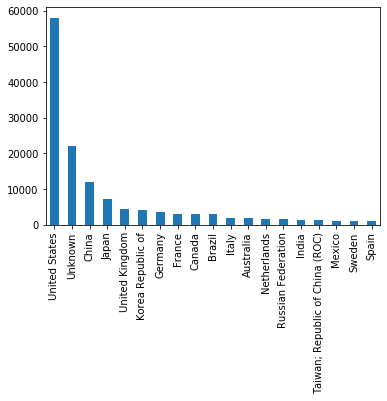

In [0]:
df.IP_country.value_counts()[df.IP_country.value_counts() > 1000].plot(kind='bar')
# Here Unknow can be traced back as a fradulent Activity

In [0]:
df.to_csv('gdrive/My Drive/CSV_Files/Fraud_Data_with_country_ip.csv')

In [0]:
df = pd.read_csv('gdrive/My Drive/CSV_Files/Fraud_Data_with_country_ip.csv')

In [0]:
df.freq_device = df.freq_device.apply(lambda x: str(x) if x < 5 else
                                                '5-10' if x >=5 and x <= 10 else
                                                '11-15' if x > 10 and x <=15 else
                                                '> 15')

In [0]:
df.head()

,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country,freq_device,IP_country
0,0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,1.677722e+07,1.677747e+07,Australia,1,Japan
1,1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,1.677747e+07,1.677773e+07,China,1,United States
2,2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,1.677773e+07,1.677824e+07,China,11-15,United States
3,3,48288,2015-01-01 18:52:41,2015-01-01 18:52:42,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,5.326766e+08,5.326930e+08,Georgia,11-15,United States
4,4,128706,2015-01-01 18:52:40,2015-01-01 18:52:41,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,1.540896e+09,1.540897e+09,Slovenia,11-15,United States


In [0]:
df.signup_time = pd.to_datetime(df.signup_time, format='%Y-%m-%d %H:%M:%S')

In [0]:
df.signup_time.head()

0   2015-02-24 22:55:49
1   2015-06-07 20:39:50
2   2015-01-01 18:52:44
3   2015-01-01 18:52:41
4   2015-01-01 18:52:40
Name: signup_time, dtype: datetime64[ns]

In [0]:
df.purchase_time = pd.to_datetime(df.purchase_time, format='%Y-%m-%d %H:%M:%S')

In [0]:
df['month_purchase'] = df.purchase_time.apply(lambda x: calendar.month_name[x.month]) 

In [0]:
df['weekday_purchase'] = df.purchase_time.apply(lambda x: calendar.day_name[x.weekday()]) 

In [0]:
df['hour_of_the_day'] = df.purchase_time.apply(lambda x: x.hour) 

In [0]:
df['seconds_since_signup'] = (df.purchase_time - df.signup_time).apply(lambda x: x.total_seconds())

In [0]:
risk_country = pd.DataFrame(df.groupby(by='IP_country').mean()['class'].sort_values(ascending=False))

In [0]:
risk_country['risk_country'] = risk_country['class'].apply(lambda x:
                                'Very High risk' if x > 0.25 else
                                'High risk'      if x > 0.05 else
                                'Medium risk'    if x >0.01  else
                                'Low risk')

In [0]:
risk_country.head()

,class,risk_country
IP_country,,
Turkmenistan,1.000000,Very High risk
Namibia,0.434783,Very High risk
Sri Lanka,0.419355,Very High risk
Luxembourg,0.388889,Very High risk
Virgin Islands (U.S.),0.333333,Very High risk


In [0]:
risk_country.columns

Index(['risk_country'], dtype='object')

In [0]:
risk_country.drop('class', axis = 1, inplace=True)

In [0]:
df = df.merge(risk_country, left_on = 'IP_country', right_index=True)

In [0]:
df['quick_purchase'] = df.seconds_since_signup.apply(lambda x: 1 if x < 30 else 0)

In [0]:
df["age_category"] = df.age.apply(lambda x : 
                 "< 40" if x < 40 else
                 "40 - 49" if x < 50 else
                 "50 -59" if x < 60 else
                 "60 - 69" if x < 70 else
                 " > 70")

In [0]:
df["period_of_the_day"] = df.hour_of_the_day.apply(lambda x : 
                                                             "late night" if x < 4 else
                                                             "early morning" if x < 8 else
                                                             "morning" if x < 12 else
                                                             "early aft" if x < 16 else
                                                             "aft" if x < 20 else
                                                             "evening"
                                                            )

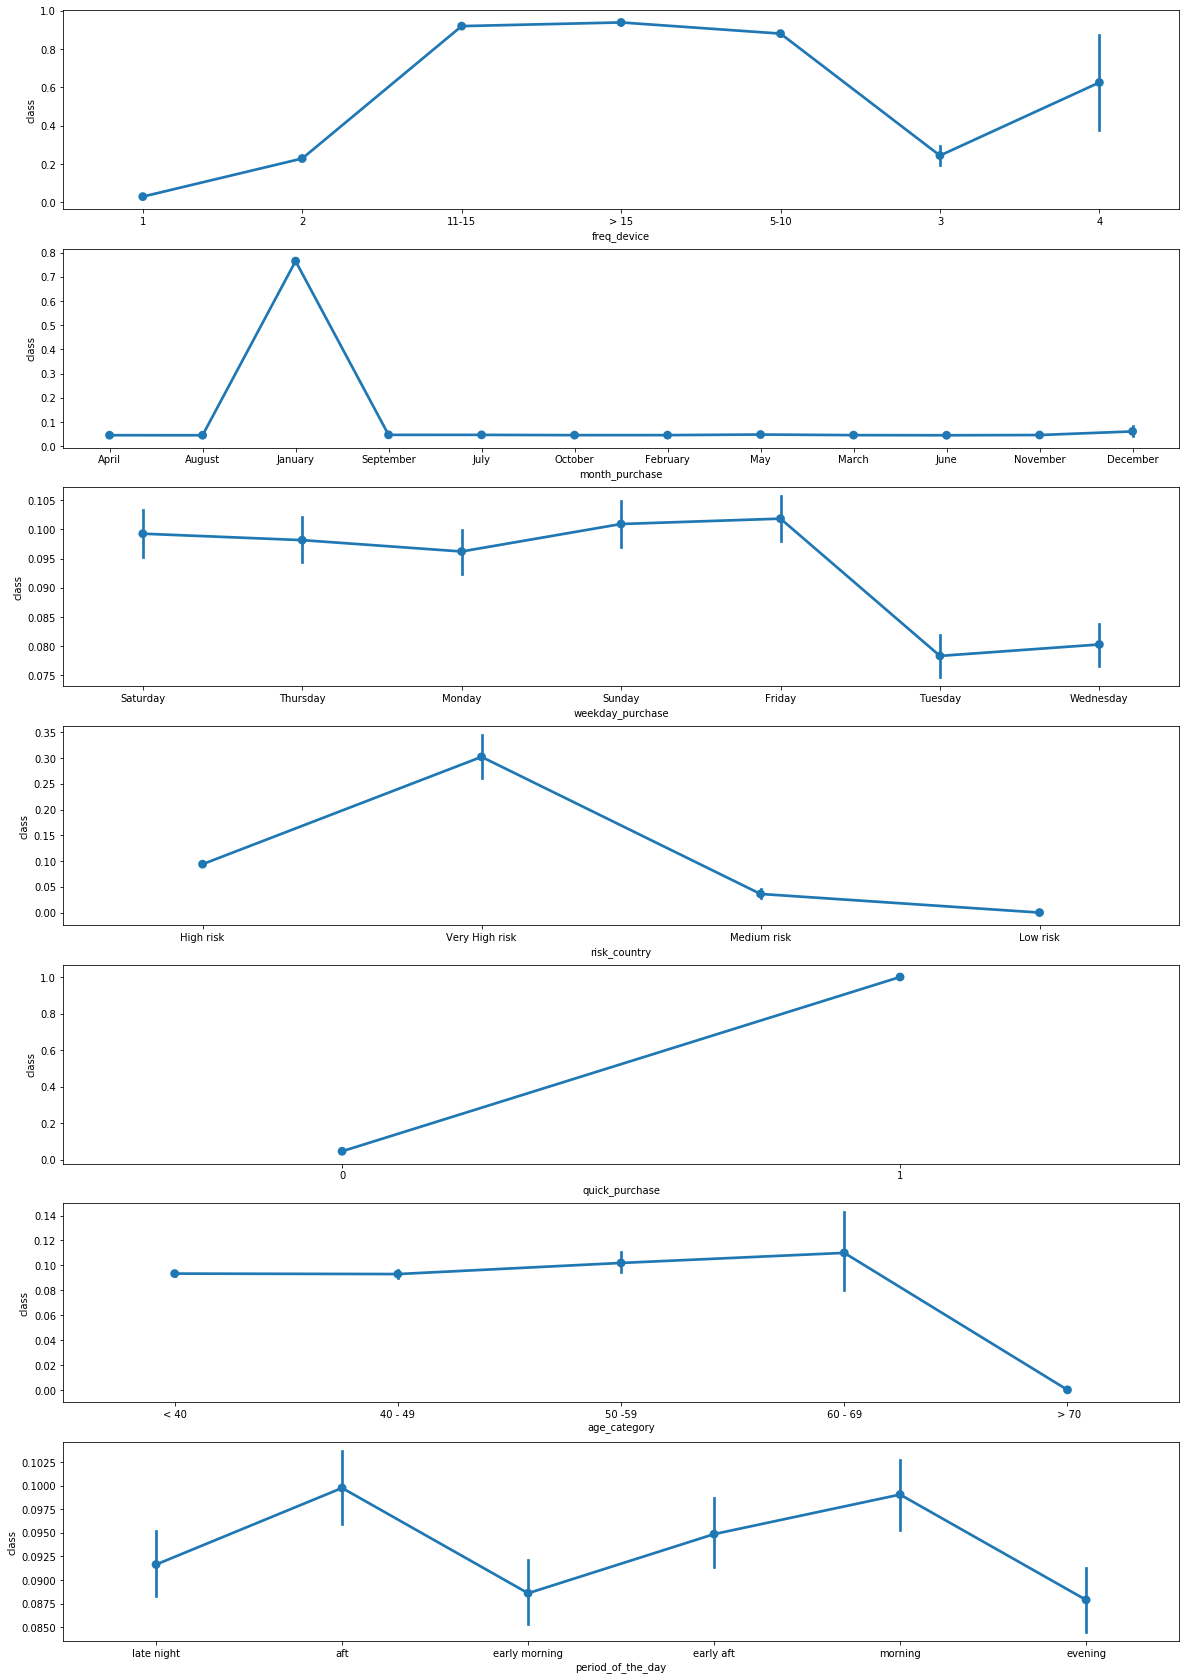

In [0]:
liste_col = ["freq_device", "month_purchase", "weekday_purchase",
                "risk_country", "quick_purchase",
                "age_category","period_of_the_day"]

f, ax = plt.subplots(len(liste_col),1, figsize = (20 , 30))

for i, colonne in enumerate(liste_col) :
    sns.catplot(x = colonne, y = "class", data = df, kind ="point", ax =ax[i], xlabel = colonne, figsize =(40,20))
    plt.close(2)

In [0]:
df['is_january'] = df.month_purchase.apply(lambda x: 1 if x == 'January' else 0)

In [0]:
df.is_january.value_counts()

0    141015
1     10097
Name: is_january, dtype: int64

In [0]:
colonne = ["user_id","signup_time","purchase_time","device_id",
                "ip_address","IP_country","hour_of_the_day",
               "seconds_since_signup", "age", 'upper_bound_ip_address',
          'lower_bound_ip_address', 'country']
df = df.drop(colonne, axis = 1)
df.head()

,Unnamed: 0,purchase_value,source,browser,sex,class,freq_device,month_purchase,weekday_purchase,risk_country,quick_purchase,age_category,period_of_the_day,is_january
0,0,34,SEO,Chrome,M,0,1,April,Saturday,High risk,0,< 40,late night,0
61,61,72,Direct,Chrome,F,0,1,April,Thursday,High risk,0,< 40,aft,0
70,70,52,Direct,Chrome,F,0,1,August,Monday,High risk,0,40 - 49,early morning,0
84,84,67,Direct,IE,F,0,2,January,Monday,High risk,0,40 - 49,early aft,1
91,91,33,SEO,Chrome,F,0,2,September,Sunday,High risk,0,< 40,morning,0


In [0]:
#X = pd.get_dummies(df.drop("class", axis=1),drop_first= True)
X = df.drop("class", axis=1)
y = df["class"]

In [0]:
X = pd.get_dummies(X)
X.head()

,Unnamed: 0,purchase_value,quick_purchase,is_january,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_F,sex_M,freq_device_1,freq_device_11-15,freq_device_2,freq_device_3,freq_device_4,freq_device_5-10,freq_device_> 15,month_purchase_April,month_purchase_August,month_purchase_December,month_purchase_February,month_purchase_January,month_purchase_July,month_purchase_June,month_purchase_March,month_purchase_May,month_purchase_November,month_purchase_October,month_purchase_September,weekday_purchase_Friday,weekday_purchase_Monday,weekday_purchase_Saturday,weekday_purchase_Sunday,weekday_purchase_Thursday,weekday_purchase_Tuesday,weekday_purchase_Wednesday,risk_country_High risk,risk_country_Low risk,risk_country_Medium risk,risk_country_Very High risk,age_category_ > 70,age_category_40 - 49,age_category_50 -59,age_category_60 - 69,age_category_< 40,period_of_the_day_aft,period_of_the_day_early aft,period_of_the_day_early morning,period_of_the_day_evening,period_of_the_day_late night,period_of_the_day_morning
0,0,34,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
61,61,72,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
70,70,52,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
84,84,67,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
91,91,33,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state = 42,
                                                    stratify = y,
                                                    test_size = 0.25
                                                   ) 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
from sklearn.linear_model import LogisticRegression
LogR = LogisticRegression(class_weight = 'Balanced')
LogR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
LogR.score(X_test, y_test)

0.9561914341680343

In [0]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
model.score(X_test, y_test)

0.8972682513632273

In [0]:
from sklearn.model_selection import cross_val_score
cross_val_score(LogR,X, y, cv=10).mean()

0.9355448834264347

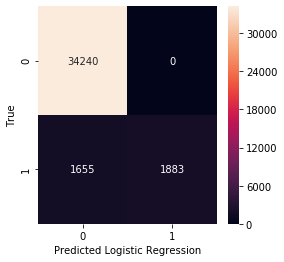

In [0]:
f, ax = plt.subplots(figsize =(4,4))

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, LogR.predict(X_test))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted Logistic Regression')
plt.ylabel('True');

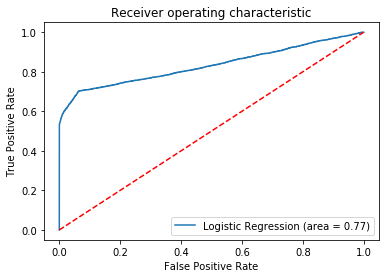

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, LogR.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, LogR.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [0]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', class_weight='balanced')

In [0]:
%time svm.fit(X_train, y_train)

CPU times: user 54min 57s, sys: 3.14 s, total: 55min
Wall time: 55min 1s


SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
svm.score(X_test, y_test)

0.9161946106199376

In [0]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

rtc = XGBClassifier(n_jobs = -1, random_state =42)
params = { #'max_depth' : np.arange(1,6),
          "learning_rate" : np.arange(0.1,0.5,0.05),
          "n_estimators" : np.arange(10,100,10)}

grid =  GridSearchCV(estimator=rtc,       
                     param_grid= params,  
                     cv = 10,            
                    n_jobs =-1)      

grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
                         'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 8

In [0]:
grid.best_estimator_.score(X_test, y_test)

0.9561649637355074

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rtc = RandomForestClassifier()
params = {#'max_depth' : np.arange(1,5),
         'min_samples_leaf' : [1, 5, 10, 20],
         "n_estimators" : np.arange(10,100,20)}

grid1 =  GridSearchCV(estimator=rtc,       
                     param_grid= params,  
                     cv = 10,             
                    n_jobs =-1)           
grid1.fit(X_train, y_train)


In [0]:
print( grid1.best_estimator_.score(X_test, y_test)) 
grid1.best_estimator_.get_params()

0.9561914341680343


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 70,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}